<a href="https://colab.research.google.com/github/alangkim/fchollet/blob/main/Makerere_Fall_Armyworm_Crop_Challenge_%EC%9C%A4%ED%95%9C%EC%84%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
os.listdir('drive/MyDrive')

['Colab Notebooks',
 'Deep_Learning_with_Python_Second_Editio.pdf',
 'Test.csv',
 'Train.csv',
 'Images_total.zip',
 '딥러닝_공모전',
 'Untitled map.gmap',
 'CAU',
 'Screenshot_20220608-171939 (1).jpg',
 'Screenshot_20220608-171939.jpg']

In [9]:
!unzip /content/drive/MyDrive/Images_total.zip

Archive:  /content/drive/MyDrive/Images_total.zip
  inflating: Images/id_5k9hpwihkzlib.jpg  
  inflating: Images/id_jyja425z3qiom.jpg  
  inflating: Images/id_sso3d86mj6p2a.jpg  
  inflating: Images/id_vhbqipasvp2ja.jpg  
  inflating: Images/id_3xyaaakk3g6qi.jpg  
  inflating: Images/id_u2hlhskic2oo1.jpg  
  inflating: Images/id_mpj645unlvb6k.jpg  
  inflating: Images/id_7ihrnacrl4xz5.jpg  
  inflating: Images/id_zsts4k0kqtywj.jpg  
  inflating: Images/id_zz9lwehh5sxdp.jpg  
  inflating: Images/id_3vf4bxm7i4m5r.jpg  
  inflating: Images/id_dphuozuvmo8x6.jpg  
  inflating: Images/id_4xfzmmgfc171g.jpg  
  inflating: Images/id_ormmv91t0i7zz.jpg  
  inflating: Images/id_e5ojnfaxfdcst.jpg  
  inflating: Images/id_me3ikxbvg1pdv.jpg  
  inflating: Images/id_0r2hd8hfafwbn.jpg  
  inflating: Images/id_4eslc29j924hd.jpg  
  inflating: Images/id_jgpf07teyj9q9.jpg  
  inflating: Images/id_02amazy34fgh2.jpg  
  inflating: Images/id_vg9ik79ghapah.jpg  
  inflating: Images/id_pthnvt4do806c.jpg  
  in

In [10]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/Images") 
new_base_dir = pathlib.Path("/ABC") 

In [14]:
os.listdir('/content')

['.config', 'drive', 'Images', 'sample_data']

In [11]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/Train.csv")

In [12]:
df_pest = df[df["Label"] == 1] 
df_nopest = df[df["Label"] == 0]

In [15]:
file_names = os.listdir(original_dir)

In [16]:
num = 0
for name in file_names :
  for i in df_pest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'pest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - pest

In [17]:
num = 0
for name in file_names :
  for i in df_nopest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'nopest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - nopest

In [18]:
file_names = os.listdir(original_dir)
file_names # train에 속한 것들은 모두 이름 변경 완료 

['id_4y8an286led98.jpg',
 'id_gqlo065h5hctv.jpg',
 'id_nnmtp23nh21z5.jpg',
 'pest501.jpg',
 'pest194.jpg',
 'id_9f7joebkno5q1.jpg',
 'pest660.jpg',
 'nopest129.jpg',
 'pest301.jpg',
 'id_qgms497hd7f9v.jpg',
 'nopest374.jpg',
 'pest121.jpg',
 'id_ms7f8ijudi9g3.jpg',
 'id_ahx8f5r6z3xvq.jpg',
 'nopest561.jpg',
 'nopest345.jpg',
 'id_0l90ghtsslv6g.jpg',
 'pest269.jpg',
 'pest473.jpg',
 'pest51.jpg',
 'pest17.jpg',
 'nopest173.jpg',
 'pest325.jpg',
 'id_bu8pvqpxq0d3y.jpg',
 'nopest516.jpg',
 'id_nh8vyrxjxmyou.jpg',
 'id_ue07rv7g55wio.jpg',
 'id_dkzvwmnm20lcm.jpg',
 'nopest172.jpg',
 'id_7il04emph38vg.jpg',
 'nopest277.jpg',
 'id_5aks00n4wsays.jpg',
 'nopest276.jpg',
 'nopest386.jpg',
 'id_qw304ubi1hf9p.jpg',
 'pest508.jpg',
 'id_0uh3w9bijtewm.jpg',
 'id_qmu0sn3haptpj.jpg',
 'id_b2bj4x1c0i5oz.jpg',
 'pest372.jpg',
 'id_9lglkvqx4b7ob.jpg',
 'pest386.jpg',
 'id_s5qrxe555yb08.jpg',
 'pest527.jpg',
 'nopest285.jpg',
 'id_q18t89sqbo3km.jpg',
 'pest253.jpg',
 'id_f5qju4mm4ohkp.jpg',
 'nopest424.jp

In [19]:
def make_subset(subset_name, start_index, end_index):
    for category in ("pest", "nopest"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir) # 폴더 생성
        
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.move(src=original_dir / fname,
                            dst=dir / fname)

In [20]:
# 600*2 training set, 209*2 validation set 
make_subset("train", start_index=0, end_index=600) # training set 600개
make_subset("validation", start_index=600, end_index=809) # validation set 809개 

In [21]:
shutil.move(src=original_dir, dst= new_base_dir / "test" / "testset") # train/validation에 포함되지 않은 이미지를 testset으로 이동

PosixPath('/ABC/test/testset')

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [ ]:
im1 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/nopest/nopest0.jpg")
im2 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/pest/pest1.jpg")

Text(0.5, 0, '(1024, 768, 3)')

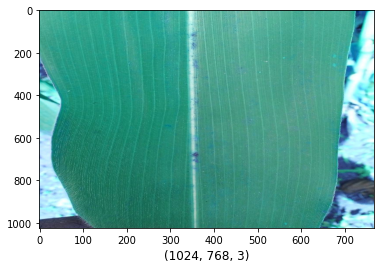

In [ ]:
plt.imshow(im1, aspect='auto')
plt.xlabel(f'{im1.shape}', fontsize=12)

Text(0.5, 0, '(1024, 768, 3)')

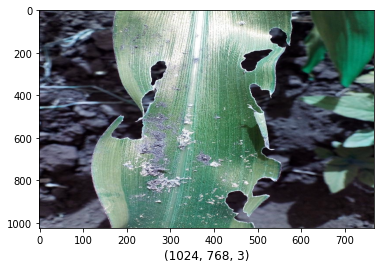

In [ ]:
plt.imshow(im2, aspect='auto')
plt.xlabel(f'{im2.shape}', fontsize=12)

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory( # train dataset 생성(1200개)
    new_base_dir / "train",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory( # validation dataset 생성(418개)
    new_base_dir / "validation",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)

Found 1200 files belonging to 2 classes.
Found 418 files belonging to 2 classes.


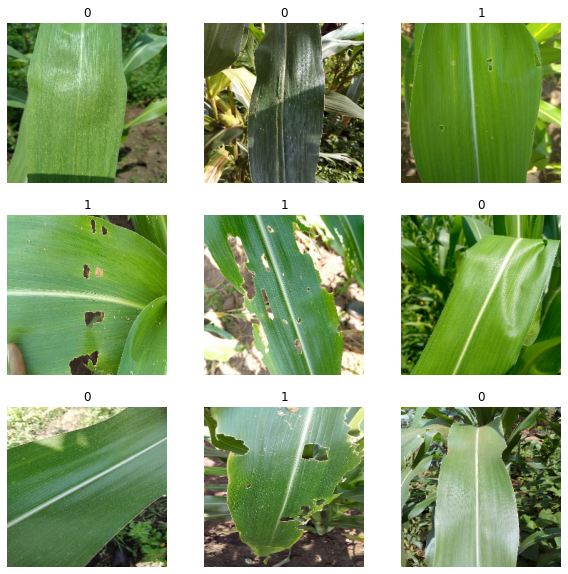

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

# 배치 1을 가져와 확인
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


# 수업에서 배운 모델

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs) # augmentation
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # dropout
# dropout을 convolution layer에 사용하는 것은 좋지 않다.
# 일반적인 Dropout은 convolution layer에 사용하지 않는다.
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# Training the regularized convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - 23s 198ms/step - loss: 0.7507 - accuracy: 0.5208 - val_loss: 0.7753 - val_accuracy: 0.5000
Epoch 2/100
38/38 [==============================] - 8s 176ms/step - loss: 0.6914 - accuracy: 0.5508 - val_loss: 0.6459 - val_accuracy: 0.6268
Epoch 3/100
38/38 [==============================] - 8s 175ms/step - loss: 0.6980 - accuracy: 0.5750 - val_loss: 0.6414 - val_accuracy: 0.7081
Epoch 4/100
38/38 [==============================] - 13s 263ms/step - loss: 0.6652 - accuracy: 0.7358 - val_loss: 0.4055 - val_accuracy: 0.8158
Epoch 5/100
38/38 [==============================] - 8s 176ms/step - loss: 0.5541 - accuracy: 0.7350 - val_loss: 0.5930 - val_accuracy: 0.7656
Epoch 6/100
38/38 [==============================] - 8s 175ms/step - loss: 0.4496 - accuracy: 0.7958 - val_loss: 0.5277 - val_accuracy: 0.7321
Epoch 7/100
38/38 [==============================] - 8s 187ms/step - loss: 0.4128 - accuracy: 0.8233 - val_loss: 0.4066 - val_accuracy: 0.89

# resnet 사용

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

In [ ]:
from keras.preprocessing import image
tf.keras.applications.resnet50.preprocess_input # resnet 이미지 전처리 함수? 

<function keras.applications.resnet.preprocess_input>

In [ ]:
resnet = ResNet50(include_top = False, weights= 'imagenet', input_shape=(224,224,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet.trainable = False # convolution 레이어 얼리기

In [ ]:
data_augmentation = keras.Sequential( # 데이터 증식
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [ ]:
# 모델링
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["AUC"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks) 

Epoch 1/30
38/38 [==============================] - 26s 275ms/step - loss: 0.4956 - auc: 0.8426 - val_loss: 0.1644 - val_auc: 0.9912
Epoch 2/30
38/38 [==============================] - 10s 234ms/step - loss: 0.1886 - auc: 0.9836 - val_loss: 0.1083 - val_auc: 0.9942
Epoch 3/30
38/38 [==============================] - 10s 225ms/step - loss: 0.1158 - auc: 0.9943 - val_loss: 0.1009 - val_auc: 0.9946
Epoch 4/30
38/38 [==============================] - 10s 223ms/step - loss: 0.0962 - auc: 0.9951 - val_loss: 0.0854 - val_auc: 0.9955
Epoch 5/30
38/38 [==============================] - 12s 299ms/step - loss: 0.0902 - auc: 0.9954 - val_loss: 0.0820 - val_auc: 0.9959
Epoch 6/30
38/38 [==============================] - 10s 226ms/step - loss: 0.0780 - auc: 0.9961 - val_loss: 0.0762 - val_auc: 0.9965
Epoch 7/30
38/38 [==============================] - 9s 214ms/step - loss: 0.0677 - auc: 0.9977 - val_loss: 0.0854 - val_auc: 0.9964
Epoch 8/30
38/38 [==============================] - 10s 227ms/step - l

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["auc"]
val_accuracy = history.history["val_auc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training auc")
plt.plot(epochs, val_accuracy, "b", label="Validation auc")
plt.title("Training and validation auc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_dataset = image_dataset_from_directory( # test dataset
    new_base_dir/'test',
    shuffle=False,
    image_size=(224, 224),
    batch_size=32)

Found 1081 files belonging to 1 classes.


In [ ]:
image_batch = test_dataset.as_numpy_iterator()
image_batch

In [ ]:
predictions = model.predict(image_batch) # 예측 
predictions = tf.where(predictions < 0.5, 0, 1) # 이진데이터분류이므로 0 또는 1로 코딩 

In [ ]:
predictions.numpy() # prediction값 확인 

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
data_df = pd.DataFrame(predictions.numpy())
data_df.head() 

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
data_df.columns = ['pred']

In [ ]:
testdf = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Test.csv")
testdf['pred'] = data_df
testdf.head()

In [ ]:
testdf.to_csv('prediction.csv', index=False) # csv로 추출 

In [ ]:
# test accuracy 0.9907407407407407

In [ ]:
# fine tuning

In [ ]:
resnet.trainable = True
for layer in resnet.layers[:-3]:
    layer.trainable = False
# 마지막 층에서 마지막에서 네번째 층까지 동결 

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), # 낮은 학습률 사용 
              metrics=["AUC"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
38/38 [==============================] - 14s 253ms/step - loss: 0.0333 - auc: 0.9992 - val_loss: 0.0696 - val_auc: 0.9976
Epoch 2/30
38/38 [==============================] - 9s 213ms/step - loss: 0.0287 - auc: 0.9995 - val_loss: 0.0696 - val_auc: 0.9976
Epoch 3/30
38/38 [==============================] - 10s 227ms/step - loss: 0.0360 - auc: 0.9993 - val_loss: 0.0695 - val_auc: 0.9976
Epoch 4/30
38/38 [==============================] - 10s 228ms/step - loss: 0.0309 - auc: 0.9987 - val_loss: 0.0695 - val_auc: 0.9977
Epoch 5/30
38/38 [==============================] - 10s 230ms/step - loss: 0.0381 - auc: 0.9992 - val_loss: 0.0694 - val_auc: 0.9977
Epoch 6/30
38/38 [==============================] - 9s 214ms/step - loss: 0.0339 - auc: 0.9993 - val_loss: 0.0694 - val_auc: 0.9977
Epoch 7/30
38/38 [==============================] - 10s 225ms/step - loss: 0.0408 - auc: 0.9989 - val_loss: 0.0694 - val_auc: 0.9977
Epoch 8/30
38/38 [==============================] - 10s 226ms/step - lo